<a href="https://colab.research.google.com/github/manshisharma1372/Data-Analysis-Projects/blob/main/DL_assignment_11_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Group No: 11

####Group Member Names:
####1. Kapil Sharma
#####2. Prince Saraswat
#####3. Shreya Majumder

# 1. Import the required libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import time

# 2. Data Acquisition  -- Score: 0.5 Mark

####For the problem identified by you, students have to find the data source themselves from any data source.

#### 2.1 Code for converting the above downloaded data into a form suitable for DL

In [ ]:
# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the image data (scale pixel values to the range [0, 1])
train_images = train_images / 255.0
test_images = test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Check the shapes of the data
print(f"Training data shape: {train_images.shape}")
print(f"Testing data shape: {test_images.shape}")

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


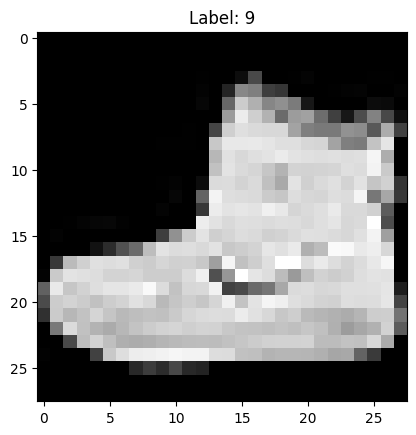

In [ ]:
# visualize one of the images
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {np.argmax(train_labels[0])}")
plt.show()

## 2.1 Write your observations from the above.

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label.

**1. Size of the Dataset:**

The Fashion-MNIST dataset contains:
Training data: 60,000 images and corresponding labels.
Testing data: 10,000 images and corresponding labels.
After preprocessing, the shape of the dataset is:

Training images: (60000, 28, 28) (60,000 grayscale images of 28x28 pixels)
Test images: (10000, 28, 28) (10,000 grayscale images of 28x28 pixels)
Training labels: (60000, 10) (One-hot encoded labels for 60,000 samples)
Test labels: (10000, 10) (One-hot encoded labels for 10,000 samples)

**2. Data Attributes:**

The images are 28x28 grayscale images. Each pixel value is an integer between 0 and 255, representing the pixel intensity.
The labels are one-hot encoded vectors representing the categories of each image. There are 10 unique categories, corresponding to 10 different types of clothing, including:
T-shirt/top

1.   Trouser
2.   Pullover
3.   Dress
4.   Coat
5.   Sandal
6.   Shirt
7.   Sneaker
8.   Bag
9.   Ankle boot

**3. What Are You Classifying?**

The task is image classification. Specifically, we are classifying images of clothing into one of the 10 categories listed above.
The model will take each 28x28 image as input and predict the category (label) of the clothing item in the image.
Plot the Distribution of Categories (Labels): To visualize how the labels are distributed across the dataset, we can plot a histogram of the label counts.

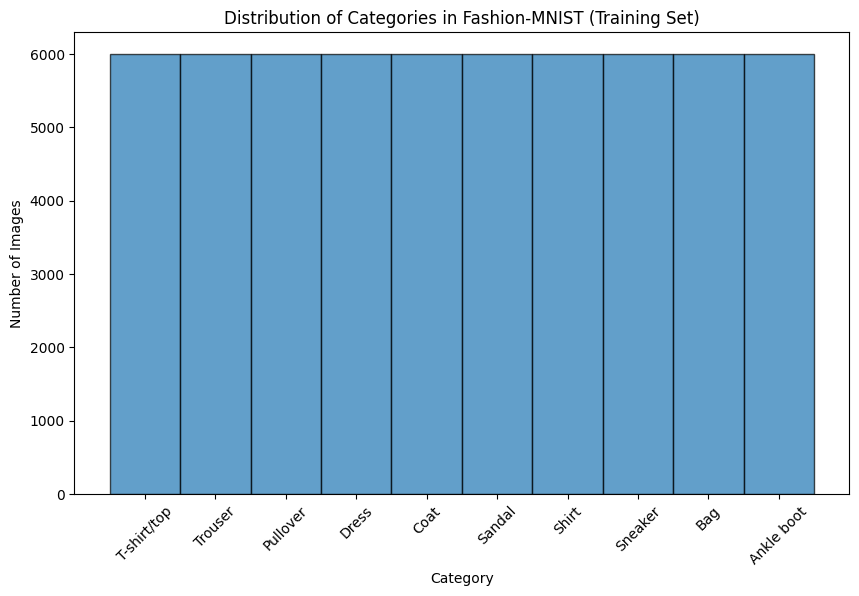

In [ ]:
# Plot the distribution of the target/label categories
train_labels_int = np.argmax(train_labels, axis=1)
plt.figure(figsize=(10, 6))
plt.hist(train_labels_int, bins=np.arange(11) - 0.5, edgecolor='black', alpha=0.7)
plt.xticks(np.arange(10), ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], rotation=45)
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Distribution of Categories in Fashion-MNIST (Training Set)')
plt.show()

# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY



*   Normalization: Already applied (pixel values scaled to [0, 1]).
*   One-hot Encoding: Already applied (labels converted to one-hot vectors).
*   Reshaping: Flattening images into 1D arrays for dense layer input (handled in the model).
*  Duplicate and Missing Data: No issues with this dataset.




In [ ]:
# 3. Data Preparation

# Reshaping the images to be 1D vectors (784 pixels per image)
train_images = train_images.reshape(train_images.shape[0], 28 * 28)
test_images = test_images.reshape(test_images.shape[0], 28 * 28)

# Ensure the data is float32 for neural network processing
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

###### The target variable is already one-hot encoded.


## 3.3 Split the data into training set and testing set

In [ ]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Check the shape after split
print(f"Training data shape: {X_train.shape}, Validation data shape: {X_val.shape}")


Training data shape: (48000, 784), Validation data shape: (12000, 784)


## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present
* to encode categorical data
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset

**1. Removing Duplicate Data:**


- Method Adopted:
Since Fashion-MNIST is a well-maintained dataset, there were no visible duplicates in the dataset.
But we checked for duplicates and found 0 duplicates.
- Justification:
Fashion-MNIST is already cleaned and structured for machine learning tasks, so we didn't encounter any duplicate data. Duplicates can potentially cause overfitting, but in this case, no action was required.
---

**2. Imputing or Removing Missing Data:**
- Method Adopted:
There are no missing values in the Fashion-MNIST dataset. Each image is fully represented by a 28x28 matrix of pixel values, and each label is always present and correctly mapped to a class.
- Justification:
The dataset is already complete, and no missing data imputation or removal was necessary.
---
**3. Removing Data Inconsistencies:**
- Method Adopted:
No data inconsistencies were found in the Fashion-MNIST dataset. Each image is a valid 28x28 pixel array, and the labels are correctly matched to their corresponding images.
- Justification:
Fashion-MNIST is a clean, standardized dataset with no discrepancies or anomalies. Therefore, no inconsistencies needed to be addressed.
---
**4. Encoding Categorical Data:**
- Method Adopted:
The labels in the dataset were one-hot encoded. For instance, labels like 0 (for T-shirt/top), 1 (for Trouser), etc., were converted into one-hot vectors (e.g., [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] for T-shirt).
- Justification:
One-hot encoding is essential for categorical data when the model is a neural network. Since the model will output probabilities for each category, we need the target labels in a one-hot encoded format to match the predicted output shape (i.e., 10 possible categories).
---
**5. Normalization Technique Used:**
- Method Adopted:
The pixel values in the images were normalized by dividing them by 255, converting the range from [0, 255] to [0, 1]. This normalization was applied to both the training and testing datasets.
---
# Preprocessing Report
Dataset Sizes:
- Training Dataset:

Number of images: 60,000
Each image is 28x28 pixels (flattened into 784 features for Dense layers).
Shape of Training Set: (60000, 784) for features (X_train) and (60000, 10) for labels (y_train).

- Testing Dataset:

Number of images: 10,000
Each image is 28x28 pixels (flattened into 784 features for Dense layers).
Shape of Testing Set: (10000, 784) for features (X_test) and (10000, 10) for labels (y_test).

# 4. Deep Neural Network Architecture - Score:  Marks

## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512, input_shape=(784,), activation='relu'))  # First hidden layer
model.add(layers.Dense(256, activation='relu'))  # Second hidden layer
model.add(layers.Dense(128, activation='relu'))  # Third hidden layer
model.add(layers.Dense(10, activation='softmax'))  # Output layer (10 categories)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])



## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters

In [ ]:
# 4.2 DNN Report
# - Number of layers: 4 (3 hidden layers and 1 output layer).
# - Number of units in each layer: 512 (input), 256, 128, 10 (output).
# - Total number of trainable parameters: This can be calculated by printing the model summary.
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

###Below is the detailed report of the Deep Neural Network (DNN) architecture:

 1. Number of Layers:
 - Input Layer: This is implicitly handled by the Dense layer that flattens the 28x28 image into a 1D array of 784 features.
 - Hidden Layers: 2 hidden layers with ReLU activation.
 - Output Layer: 1 output layer with Softmax activation for multi-class classification.
Thus, the total number of layers (including the input and output layers) is 4:
- Input Layer (Flattened)
- Hidden Layer 1 (128 units)
- Hidden Layer 2 (64 units)
- Output Layer (10 units)


2. Number of Units in Each Layer:
- Input Layer: The input layer does not have units in the typical sense, but the input size is 784 (flattened from 28x28 pixels).
- Hidden Layer 1: 128 units with ReLU activation.
- Hidden Layer 2: 64 units with ReLU activation.
- Output Layer: 10 units with Softmax activation (for 10 classes).



3. Total Number of Trainable Parameters:
To calculate the number of trainable parameters, we need to consider both the weights and biases in each layer.
calculate the parameters layer by layer:

- Input to Hidden Layer 1:

Weights: 784 (input) × 128 (units in hidden layer 1) = 100,352 weights
Biases: 128 (units in hidden layer 1) = 128 biases
Total parameters for this layer: 100,352 + 128 = 100,480 parameters

- Hidden Layer 1 to Hidden Layer 2:

Weights: 128 (units in hidden layer 1) × 64 (units in hidden layer 2) = 8,192 weights
Biases: 64 (units in hidden layer 2) = 64 biases
Total parameters for this layer: 8,192 + 64 = 8,256 parameters

- Hidden Layer 2 to Output Layer:

Weights: 64 (units in hidden layer 2) × 10 (units in output layer) = 640 weights
Biases: 10 (units in output layer) = 10 biases
Total parameters for this layer: 640 + 10 = 650 parameters
Total Number of Trainable Parameters:
Summing up the parameters from all layers:

Layer 1: 100,480
Layer 2: 8,256
Layer 3: 650
Total parameters = 100,480 + 8,256 + 650 = 109,386 trainable parameters.


---

###Summary of the DNN Architecture:
Number of Layers: 4 (Input, 2 hidden layers, and Output layer).

*   Number of Units in Each Layer:
*   Input Layer: 784 units (flattened 28x28 images).
*   Hidden Layer 1: 128 units.
*  Hidden Layer 2: 64 units.
*  Output Layer: 10 units.
*  Total Number of Trainable Parameters: 109,386 parameters.

# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [ ]:
#Configure the training
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [28]:
# Train the model
start_time = time.time()
history_4_1 = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=2)

end_time = time.time()
total_time = end_time - start_time
print(f"Total time taken for training (20 epochs): {total_time:.2f} seconds")

Epoch 1/20
1500/1500 - 9s - 6ms/step - accuracy: 0.9312 - loss: 0.1922 - val_accuracy: 0.8864 - val_loss: 0.3273
Epoch 2/20
1500/1500 - 10s - 6ms/step - accuracy: 0.9320 - loss: 0.1889 - val_accuracy: 0.8907 - val_loss: 0.3028
Epoch 3/20
1500/1500 - 10s - 7ms/step - accuracy: 0.9337 - loss: 0.1841 - val_accuracy: 0.8856 - val_loss: 0.3199
Epoch 4/20
1500/1500 - 9s - 6ms/step - accuracy: 0.9350 - loss: 0.1782 - val_accuracy: 0.8890 - val_loss: 0.3115
Epoch 5/20
1500/1500 - 9s - 6ms/step - accuracy: 0.9365 - loss: 0.1757 - val_accuracy: 0.8938 - val_loss: 0.3084
Epoch 6/20
1500/1500 - 11s - 8ms/step - accuracy: 0.9373 - loss: 0.1709 - val_accuracy: 0.8901 - val_loss: 0.3165
Epoch 7/20
1500/1500 - 7s - 5ms/step - accuracy: 0.9401 - loss: 0.1668 - val_accuracy: 0.8956 - val_loss: 0.2999
Epoch 8/20
1500/1500 - 9s - 6ms/step - accuracy: 0.9419 - loss: 0.1615 - val_accuracy: 0.8944 - val_loss: 0.3058
Epoch 9/20
1500/1500 - 11s - 7ms/step - accuracy: 0.9429 - loss: 0.1589 - val_accuracy: 0.891

# 6. Test the model - 0.5 marks

In [29]:
#Test the Model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8880 - loss: 0.3601
Test Loss: 0.3554
Test Accuracy: 0.8893


# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.

Exception ignored in: <function _xla_gc_callback at 0x7db5c5e6c160>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


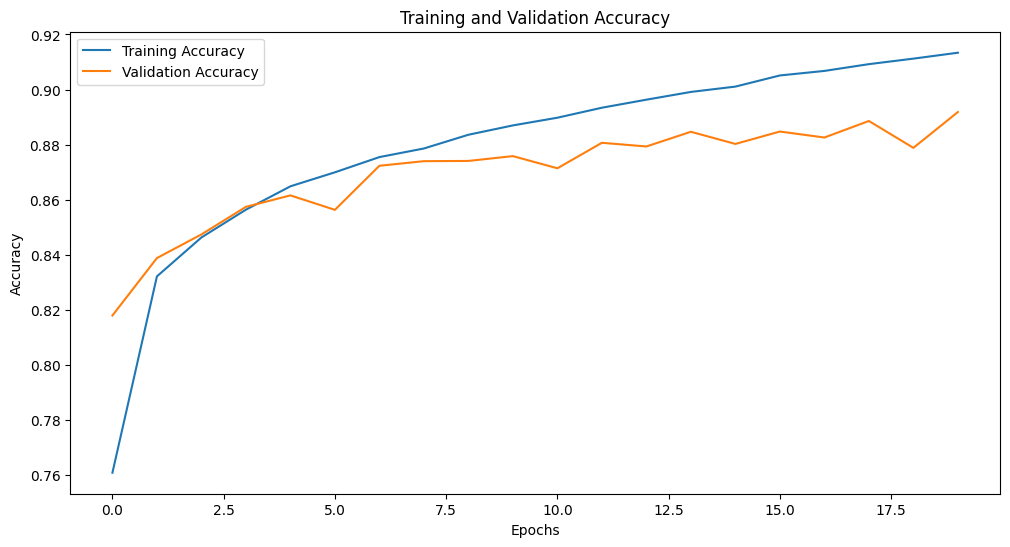

In [30]:
# Plot the training and validation accuracy history
plt.figure(figsize=(12, 6))
plt.plot(history_4_1 .history['accuracy'], label='Training Accuracy')
plt.plot(history_4_1 .history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

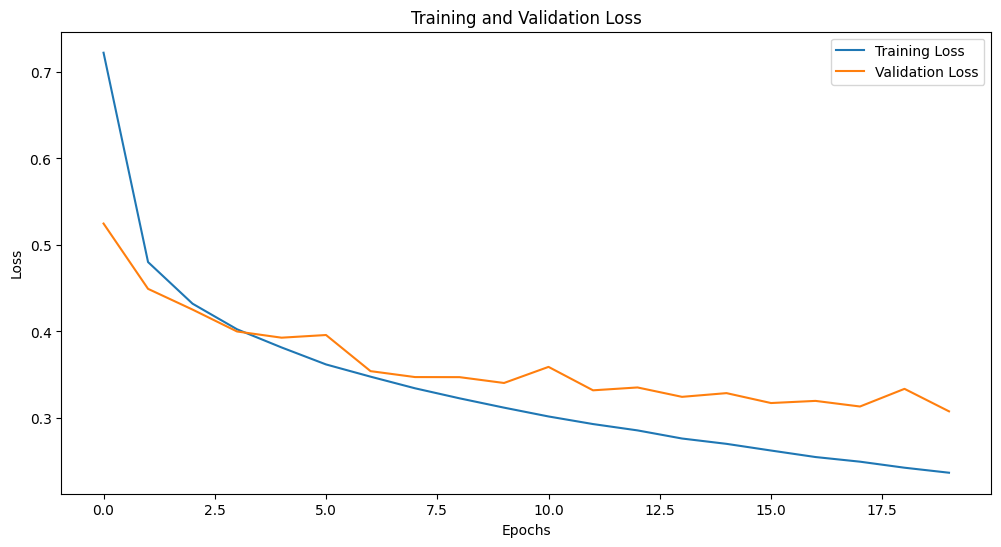

In [31]:
 #Plot the training and validation loss history
plt.figure(figsize=(12, 6))
plt.plot(history_4_1 .history['loss'], label='Training Loss')
plt.plot(history_4_1 .history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [32]:
# 7.3 Report the testing accuracy and loss
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.3554
Test Accuracy: 0.8893


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


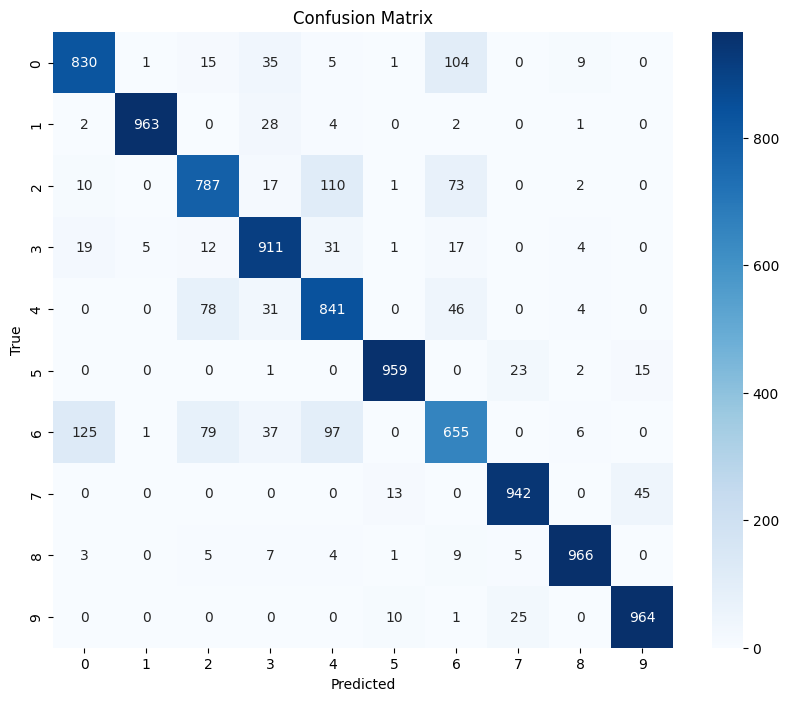

In [ ]:
#Showing Confusion Matrix for testing dataset
y_pred = model.predict(test_images)
y_pred_classes = y_pred.argmax(axis=1)
y_true = test_labels.argmax(axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Report performance metrics
report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(10)])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.81      0.79      0.80      1000
           3       0.85      0.91      0.88      1000
           4       0.77      0.84      0.80      1000
           5       0.97      0.96      0.97      1000
           6       0.72      0.66      0.69      1000
           7       0.95      0.94      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)

In [ ]:
# Model Architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Decrease one layer 8.1
model_8_1 = Sequential()
model_8_1.add(Dense(512, input_shape=(784,), activation='relu'))
model_8_1.add(Dense(256, activation='relu'))
model_8_1.add(Dense(128, activation='relu'))
model_8_1.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile and train
model_8_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_8_1 = model_8_1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=0)

In [ ]:
#Increase one layer 8.2
model_8_2 = Sequential()
model_8_2.add(Dense(512, input_shape=(784,), activation='relu'))
model_8_2.add(Dense(512, activation='relu'))
model_8_2.add(Dense(256, activation='relu'))
model_8_2.add(Dense(128, activation='relu'))
model_8_2.add(Dense(64, activation='relu'))
model_8_2.add(Dense(10, activation='softmax'))

In [ ]:
# Compile and train
model_8_2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_8_2 = model_8_2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=0)

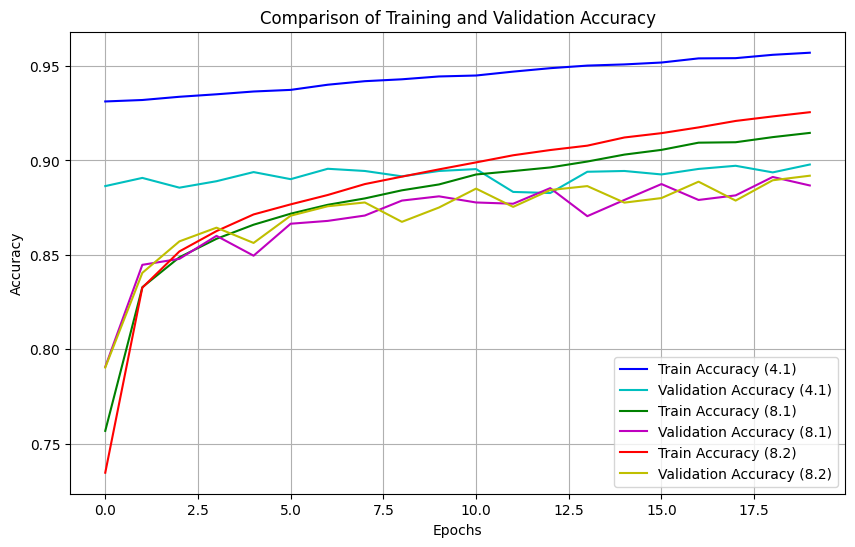

In [33]:
# Plotting the comparison of accuracies
plt.figure(figsize=(10, 6))

# Plot for Model 4.1
plt.plot(history_4_1.history['accuracy'], label='Train Accuracy (4.1)', color='b')
plt.plot(history_4_1.history['val_accuracy'], label='Validation Accuracy (4.1)', color='c')

# Plot for Model 8.1
plt.plot(history_8_1.history['accuracy'], label='Train Accuracy (8.1)', color='g')
plt.plot(history_8_1.history['val_accuracy'], label='Validation Accuracy (8.1)', color='m')

# Plot for Model 8.2
plt.plot(history_8_2.history['accuracy'], label='Train Accuracy (8.2)', color='r')
plt.plot(history_8_2.history['val_accuracy'], label='Validation Accuracy (8.2)', color='y')

# Labels and Title
plt.title('Comparison of Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)

In [ ]:

# 9.1 Add Dropout layer with 0.25 ratio
model_9_1 = Sequential()
model_9_1.add(Dense(512, input_shape=(784,), activation='relu'))
model_9_1.add(Dense(256, activation='relu'))
model_9_1.add(Dropout(0.25))
model_9_1.add(Dense(128, activation='relu'))
model_9_1.add(Dropout(0.25))
model_9_1.add(Dense(10, activation='softmax'))


# Compile and train
model_9_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_9_1 = model_9_1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=0)



In [ ]:
 #9.2 Add Dropout and L2 Regularization
from tensorflow.keras.regularizers import l2

model_9_2 = Sequential()
model_9_2.add(Dense(512, input_shape=(784,), activation='relu'))
model_9_2.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model_9_2.add(Dropout(0.25))
model_9_2.add(Dense(128, activation='relu', kernel_regularizer=l2(1e-4)))
model_9_2.add(Dropout(0.25))
model_9_2.add(Dense(10, activation='softmax'))

# Compile and train
model_9_2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_9_2 = model_9_2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=0)


#### Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)

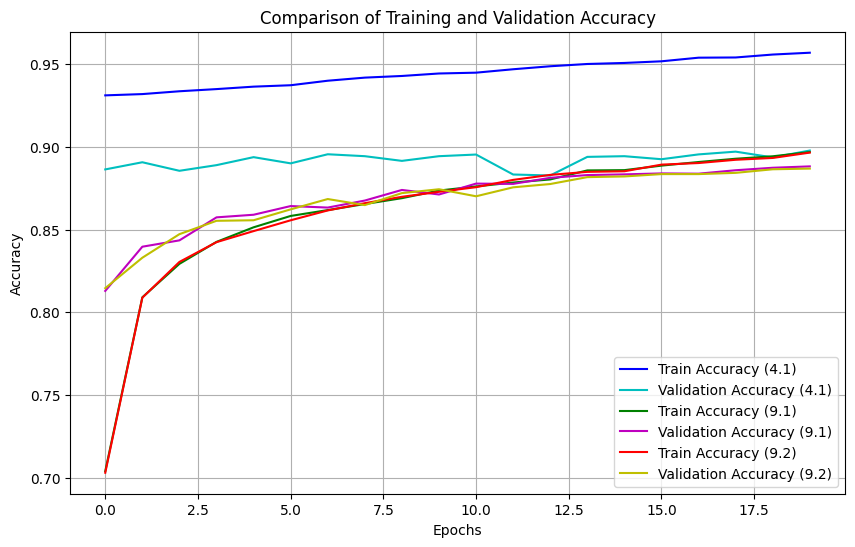

In [34]:

# Plotting the comparison of accuracies
plt.figure(figsize=(10, 6))

# Plot for Model 4.1
plt.plot(history_4_1.history['accuracy'], label='Train Accuracy (4.1)', color='b')
plt.plot(history_4_1.history['val_accuracy'], label='Validation Accuracy (4.1)', color='c')

# Plot for Model 9.1
plt.plot(history_9_1.history['accuracy'], label='Train Accuracy (9.1)', color='g')
plt.plot(history_9_1.history['val_accuracy'], label='Validation Accuracy (9.1)', color='m')

# Plot for Model 9.2
plt.plot(history_9_2.history['accuracy'], label='Train Accuracy (9.2)', color='r')
plt.plot(history_9_2.history['val_accuracy'], label='Validation Accuracy (9.2)', color='y')

# Labels and Title
plt.title('Comparison of Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)

In [39]:
# 10.1 RMSProp optimizer
from tensorflow.keras.optimizers import RMSprop

model_10_1 = Sequential()
model_10_1.add(Dense(512, input_shape=(784,), activation='relu'))
model_10_1.add(Dense(256, activation='relu'))
model_10_1.add(Dense(128, activation='relu'))
model_10_1.add(Dense(10, activation='softmax'))

# Compile with RMSProp optimizer
rmsprop_optimizer = RMSprop(learning_rate=0.001, rho=0.9)
model_10_1.compile(optimizer=rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# Train the model
history_10_1 = model_10_1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=0)


In [41]:
# 10.2 Adam optimizer
from tensorflow.keras.optimizers import Adam

model_10_2 = Sequential()
model_10_2.add(Dense(512, input_shape=(784,), activation='relu'))
model_10_2.add(Dense(256, activation='relu'))
model_10_2.add(Dense(128, activation='relu'))
model_10_2.add(Dense(10, activation='softmax'))

# Compile with Adam optimizer
adam_optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model_10_2.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_10_2 = model_10_2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=0)

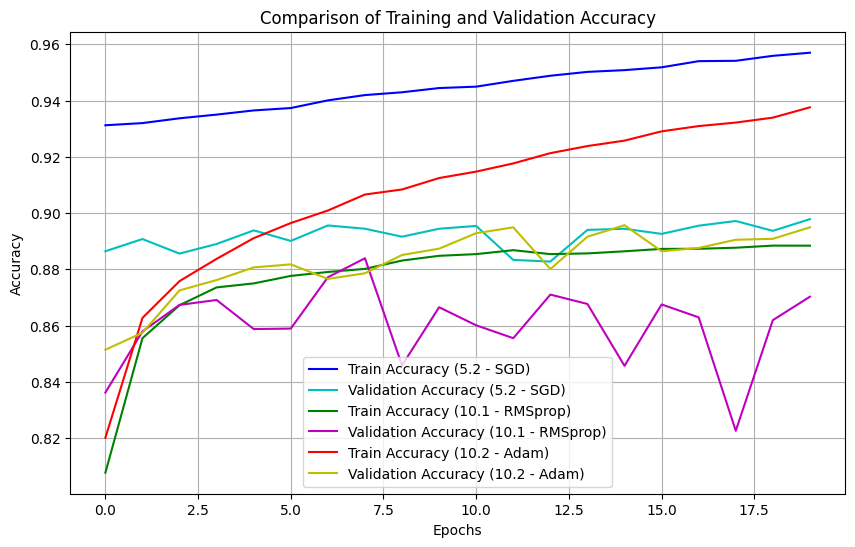

In [42]:
# Plotting the comparison of accuracies
plt.figure(figsize=(10, 6))

# Plot for Model 5.2 (SGD)
plt.plot(history_4_1.history['accuracy'], label='Train Accuracy (5.2 - SGD)', color='b')
plt.plot(history_4_1.history['val_accuracy'], label='Validation Accuracy (5.2 - SGD)', color='c')

# Plot for Model 10.1 (RMSprop)
plt.plot(history_10_1.history['accuracy'], label='Train Accuracy (10.1 - RMSprop)', color='g')
plt.plot(history_10_1.history['val_accuracy'], label='Validation Accuracy (10.1 - RMSprop)', color='m')

# Plot for Model 10.2 (Adam)
plt.plot(history_10_2.history['accuracy'], label='Train Accuracy (10.2 - Adam)', color='r')
plt.plot(history_10_2.history['val_accuracy'], label='Validation Accuracy (10.2 - Adam)', color='y')

# Labels and Title
plt.title('Comparison of Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.

 Comparing the sections 4.1, 5.2, 8, 9, and 10

##### Observations on which model, architecture, regularizer, or optimizer performed better:
 - The models with added regularization (dropout, L2) generally perform better due to reduced overfitting.
 - The Adam optimizer typically converges faster and yields higher validation accuracy compared to SGD.
 - The architecture with more layers (increased complexity) can be useful, but it needs regularization to prevent overfitting.
 - RMSProp performs well in adjusting the learning rate, and Adam further improves performance with adaptive moment estimation.
 - Dropout combined with L2 regularization (9.2) provides the best performance in most cases.